<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/09_DeepLearning/Assignment/part1_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import and Data read

In [126]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.model_selection import StratifiedKFold,KFold,train_test_split
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow import keras
from  tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD

tf.__version__

'2.4.1'

In [127]:
seed = 123
np.random.seed(seed)

In [128]:
data = pd.read_csv("Part- 1,2&3 - Signal.csv")
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [129]:
data.columns = data.columns.str.replace(" ","_")

### Exploratory Data Analysis

#### Data Type and Shape

In [130]:
data.shape

(1599, 12)

In [131]:
display("Shape of data")
display(data.shape)
display("Total missing value ")
display(data.isna().sum().sum())
display("Data type info")
display(data.info())

'Shape of data'

(1599, 12)

'Total missing value '

0

'Data type info'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter_1      1599 non-null   float64
 1   Parameter_2      1599 non-null   float64
 2   Parameter_3      1599 non-null   float64
 3   Parameter_4      1599 non-null   float64
 4   Parameter_5      1599 non-null   float64
 5   Parameter_6      1599 non-null   float64
 6   Parameter_7      1599 non-null   float64
 7   Parameter_8      1599 non-null   float64
 8   Parameter_9      1599 non-null   float64
 9   Parameter_10     1599 non-null   float64
 10  Parameter_11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

 - No special character or missing values found in data

#### Correlation Matrix

In [132]:
# Correlation Matrix
corr_matrix = data.corr()
corr_matrix = round(corr_matrix,2)
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_matrix.style.applymap(lambda x: 'background-color : red' if abs(x) >=0.6 else '')

,Parameter_1,Parameter_2,Parameter_3,Parameter_4,Parameter_5,Parameter_6,Parameter_7,Parameter_8,Parameter_9,Parameter_10,Parameter_11,Signal_Strength
Parameter_1,1.000000,-0.260000,0.670000,0.110000,0.090000,-0.150000,-0.110000,0.670000,-0.680000,0.180000,-0.060000,0.120000
Parameter_2,-0.260000,1.000000,-0.550000,0.000000,0.060000,-0.010000,0.080000,0.020000,0.230000,-0.260000,-0.200000,-0.390000
Parameter_3,0.670000,-0.550000,1.000000,0.140000,0.200000,-0.060000,0.040000,0.360000,-0.540000,0.310000,0.110000,0.230000
Parameter_4,0.110000,0.000000,0.140000,1.000000,0.060000,0.190000,0.200000,0.360000,-0.090000,0.010000,0.040000,0.010000
Parameter_5,0.090000,0.060000,0.200000,0.060000,1.000000,0.010000,0.050000,0.200000,-0.270000,0.370000,-0.220000,-0.130000
Parameter_6,-0.150000,-0.010000,-0.060000,0.190000,0.010000,1.000000,0.670000,-0.020000,0.070000,0.050000,-0.070000,-0.050000
Parameter_7,-0.110000,0.080000,0.040000,0.200000,0.050000,0.670000,1.000000,0.070000,-0.070000,0.040000,-0.210000,-0.190000
Parameter_8,0.670000,0.020000,0.360000,0.360000,0.200000,-0.020000,0.070000,1.000000,-0.340000,0.150000,-0.500000,-0.170000
Parameter_9,-0.680000,0.230000,-0.540000,-0.090000,-0.270000,0.070000,-0.070000,-0.340000,1.000000,-0.200000,0.210000,-0.060000
Parameter_10,0.180000,-0.260000,0.310000,0.010000,0.370000,0.050000,0.040000,0.150000,-0.200000,1.000000,0.090000,0.250000


In [133]:
#sns.pairplot(data)

- Parameter 1 has postive correlation with parameter 3 & 8 and negative correlation with paramater 9
- Parameter 6 & 7 has postive correlation

#### Data Distribution

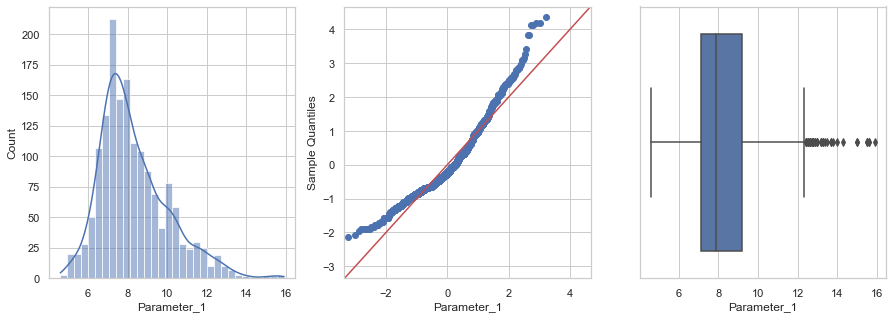

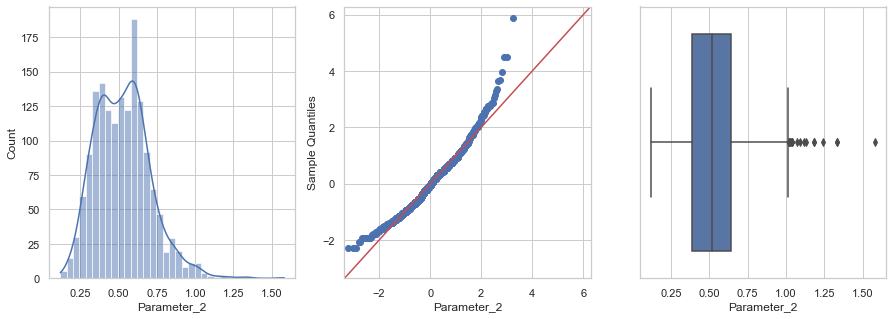

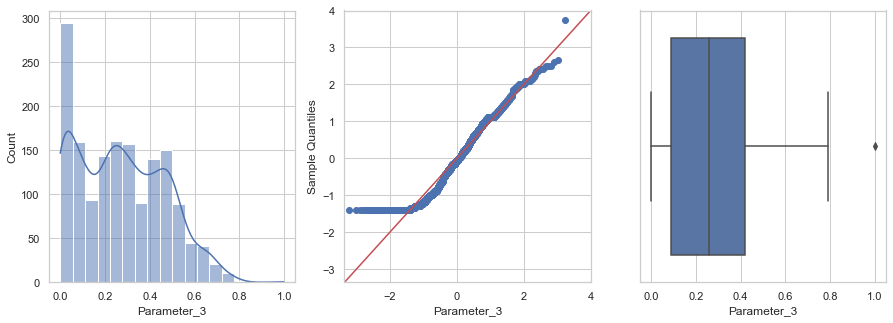

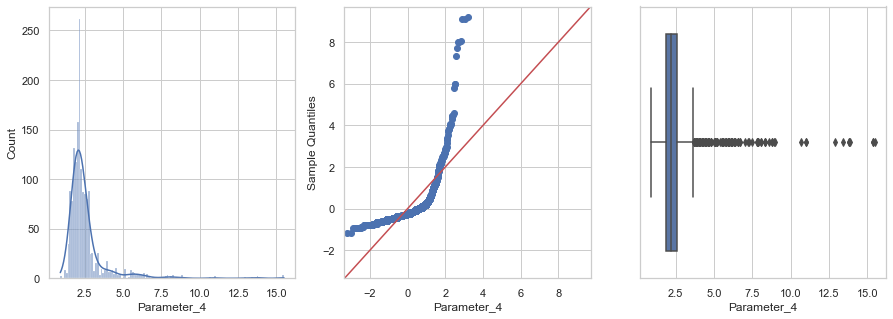

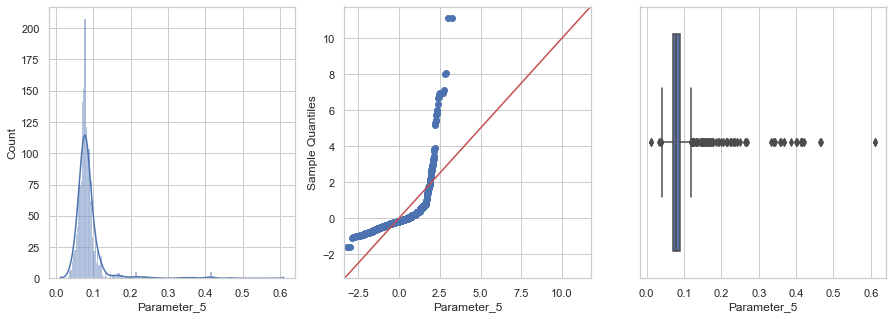

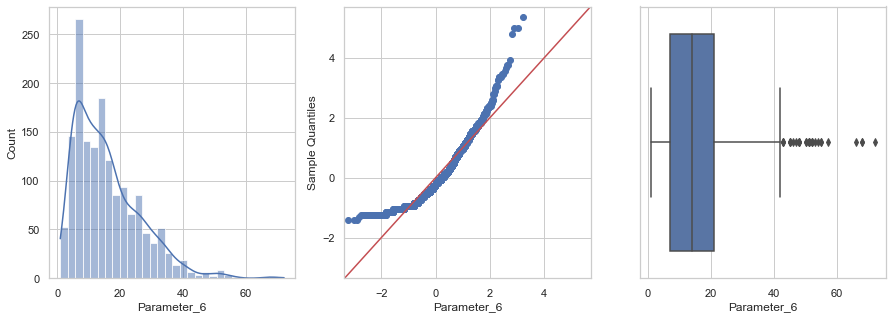

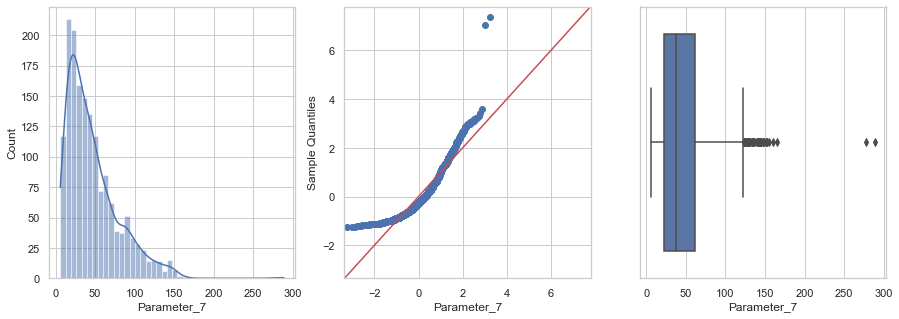

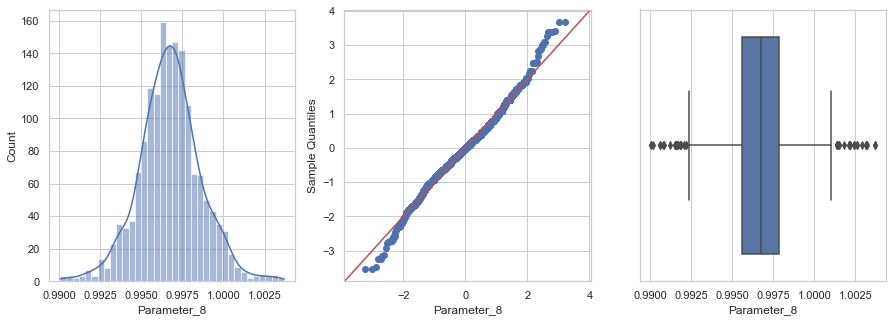

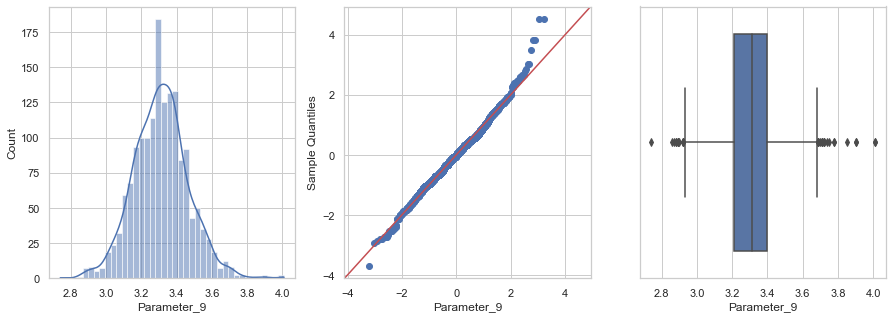

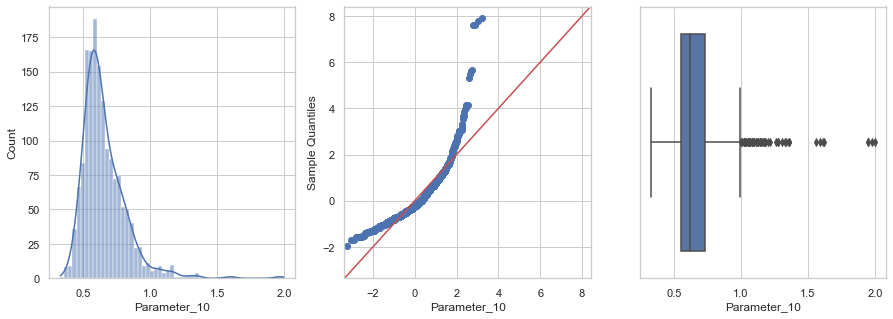

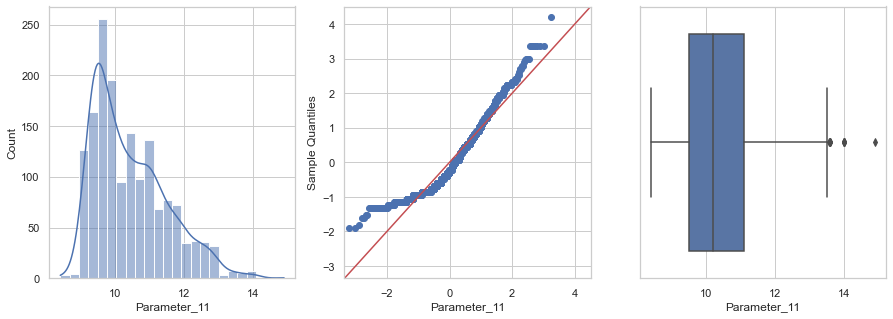

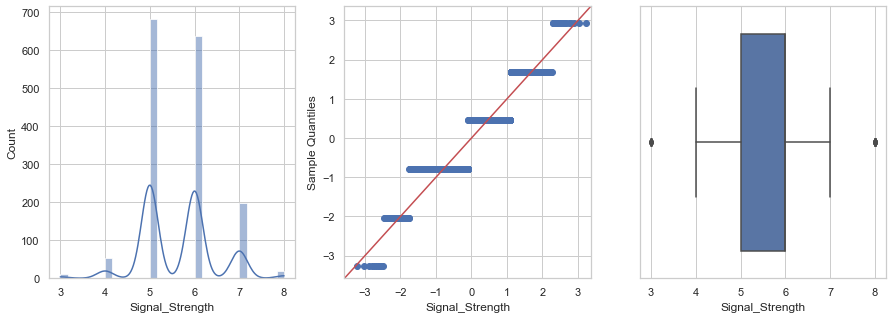

In [134]:
### Distribution of data
for column_name in data.columns:
  fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
  sns.histplot(data = data,x=column_name,kde=True,ax=ax[0])
  sm.qqplot(data[column_name],ax=ax[1],line='45',fit=True)
  ax[1].set_xlabel(column_name)
  sns.boxplot(data=data,x=column_name,ax=ax[2])
  plt.show()



- Paramter 8 & 9 - follows normal distribution , other independent features are right skewed data / parameter 3 has multiple peaks in the distribution
- Target values range from 3 - 8 , where observation count from 5 & 6 are high than others.

#### Data Stat

In [135]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Parameter_1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter_2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter_3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter_4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter_5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter_6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter_7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter_8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter_9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter_10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


 - all the parameter has different scale in there distribution

### NN Building

#### Train & Test Data split

In [136]:
X = data.drop("Signal_Strength",axis=1)
y = data.filter(["Signal_Strength"])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=123)

In [137]:
X_train.shape

(1279, 11)

#### Model Building and Architecture

In [138]:
def loss_fn(y_true, y_pred):
    abs_difference = abs(y_true - round(y_pred,0))
    return tf.reduce_mean(abs_difference, axis=-1)  

def nn_model(input_dim,lr=0.1,momentum=0.9,dropout=0.2,loss_fn = loss_fn):
	# create model
  model = Sequential(name="SignalPrediction_regression")
  model.add(Dense(25,input_dim=input_dim, activation='relu',name="HL-1",kernel_initializer=tf.keras.initializers.HeUniform()))
  model.add(Dropout(dropout,name ="DP-1"))
#   model.add(Dense(6, activation='relu',name="HL-2",kernel_initializer='he_uniform'))
#   model.add(Dropout(dropout,name ="DP-2"))       
  model.add(Dense(1,name="OL",activation="linear"))
	# Compile model
  optimizer = SGD(lr=lr, momentum=momentum)
  model.compile(loss=loss_fn, optimizer=optimizer, metrics=['mae'])
  return model

In [139]:
nn_model(X_train.shape[1]).summary()

Model: "SignalPrediction_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL-1 (Dense)                 (None, 25)                300       
_________________________________________________________________
DP-1 (Dropout)               (None, 25)                0         
_________________________________________________________________
OL (Dense)                   (None, 1)                 26        
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


### Training and Evaluation

In [140]:
##### Scaling the input
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [141]:
model = nn_model(X_train.shape[1],dropout=0)
fit_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=32, verbose=1)

Epoch 1/100


TypeError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    <ipython-input-138-d80e06f5178f>:2 loss_fn  *
        abs_difference = abs(y_true - round(y_pred,0))

    TypeError: type Tensor doesn't define __round__ method


In [ ]:
# evaluate the model
_, train_mae = model.evaluate(X_train, y_train, verbose=0)
_, test_mae = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(fit_data.history['loss'], label='train')
plt.plot(fit_data.history['val_loss'], label='test')
plt.legend()
plt.show()



